In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
#Načíta knihovny


In [3]:
df=pd.read_csv("Mall_Customers.csv")
#Načíta soubor CSV do dataframe


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#  Univariate Analysis

In [5]:
df.describe()
#Statistický přehled o číselných sloupcích v datovém rámci

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

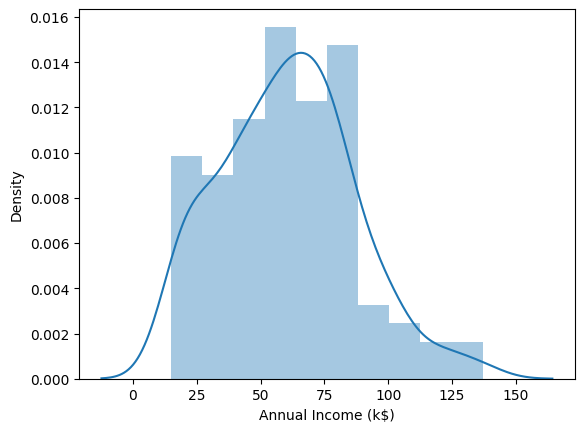

In [88]:
sns.distplot(df['Annual Income (k$)'])
#Vytvoří distribuční graf (histogram) pro sloupec „Annual Income (k$)

In [ ]:
df.columns
#Vypíše názvy všech sloupců v dataframe 

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

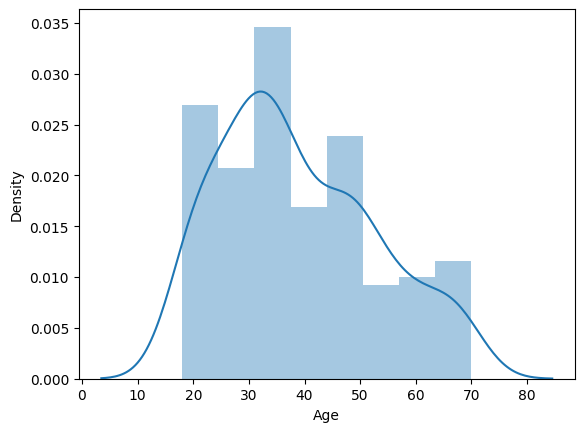

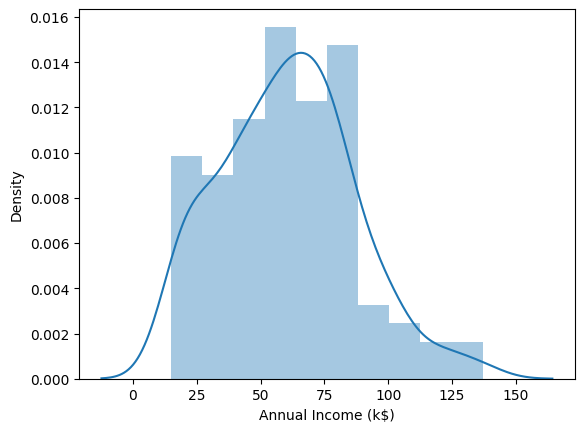

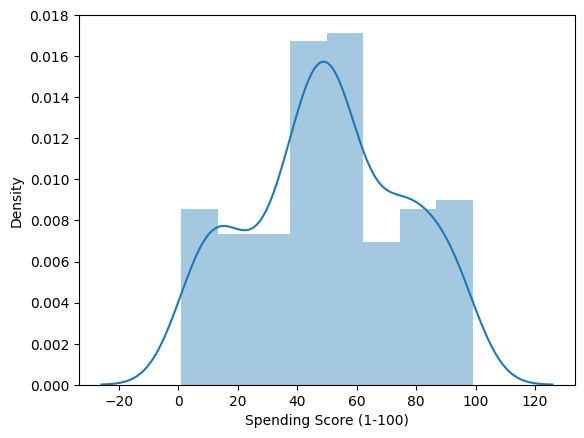

In [91]:
columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
#Vytvoří seznam názvů sloupců
for i in columns:
    plt.figure()
    sns.distplot(df[i])
#Spouští cyklus, který projde každý název sloupce ve výše uvedeném seznamu a vytvoří graf

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

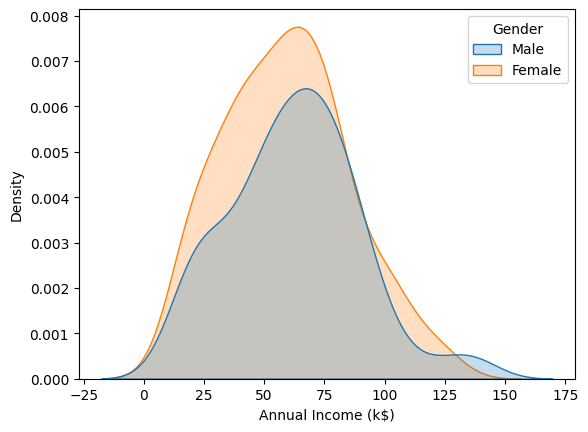

In [ ]:
sns.kdeplot(data=df, x='Annual Income (k$)', hue='Gender', fill=True)
#Vytvoří porovnání hustoty rozložení příjmu podle pohlaví.

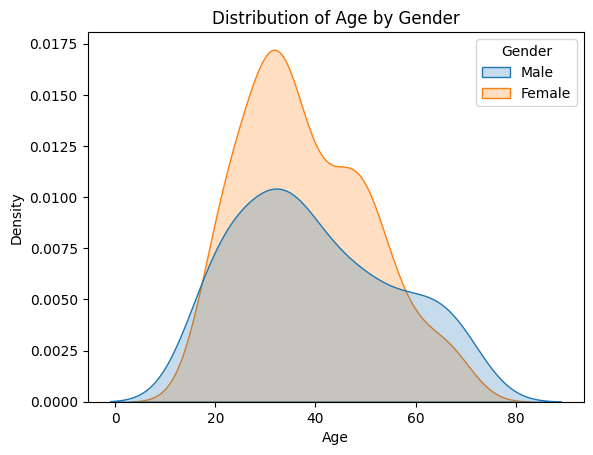

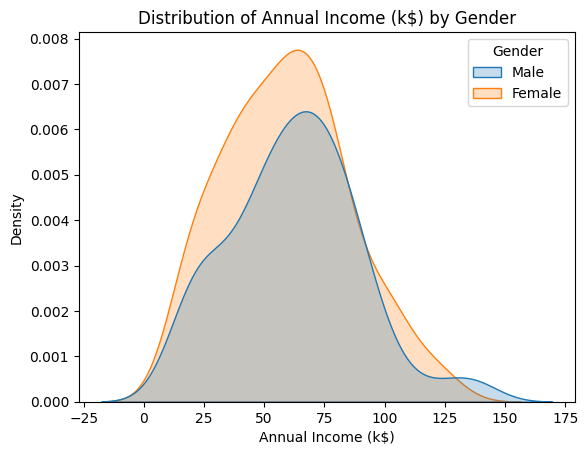

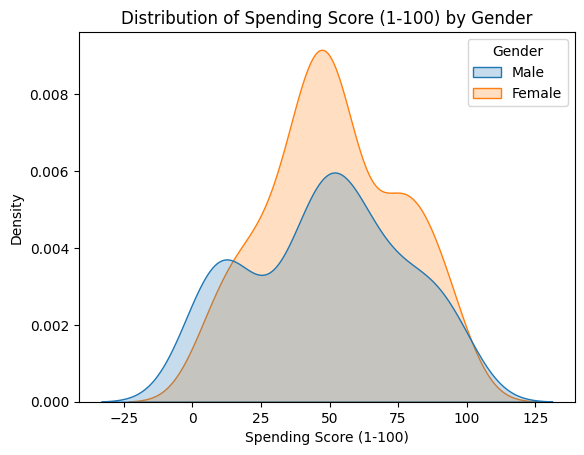

In [12]:
columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for col in columns:
    plt.figure()
    sns.kdeplot(data=df, x=col, hue='Gender', fill=True)
    plt.title(f'Distribution of {col} by Gender')
    plt.show()
#Vykreslí hustotní grafy (KDE plots) pro zadané sloupce podle pohlaví. 

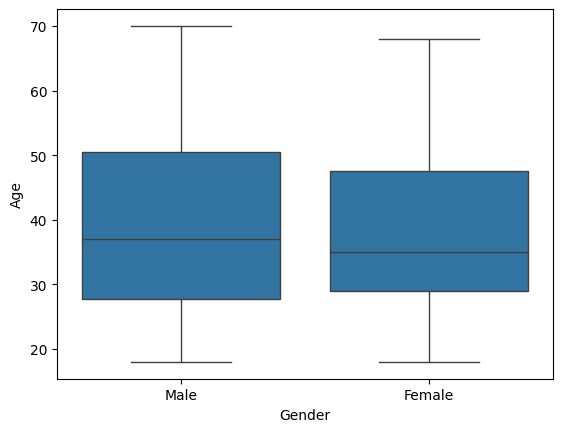

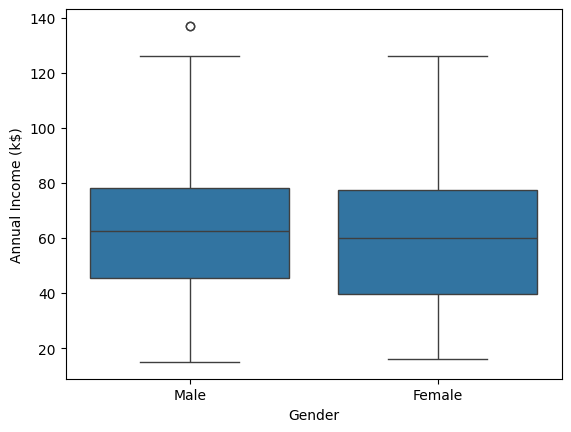

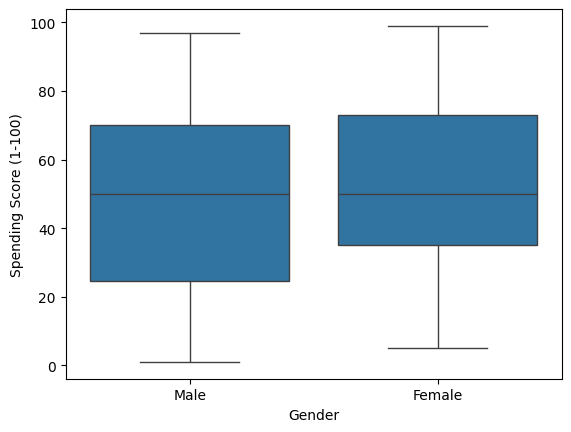

In [ ]:
columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender',y=df[i])
    plt.show()
#Vykreslí boxploty (krabicové grafy) pro sloupce:'Age', 'Annual Income (k$)', 'Spending Score (1-100)

In [14]:
df['Gender'].value_counts(normalize=True)
#Vrací relativní četnosti (v procentech) výskytu jednotlivých hodnot ve sloupci 'Gender'.

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

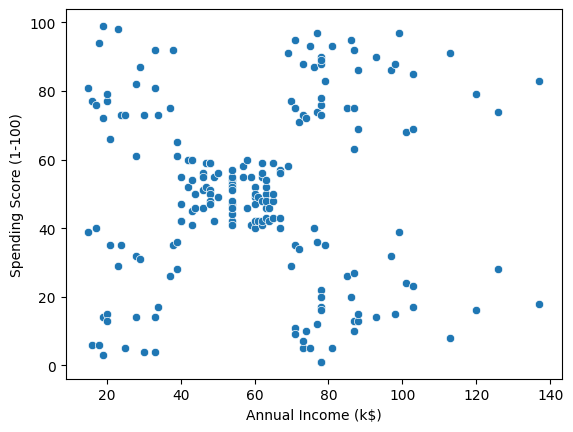

In [15]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
#Vytvoří rozptylový graf (scatter plot), který zobrazuje vztah mezi ročním příjmem a skóre spotřeby. 

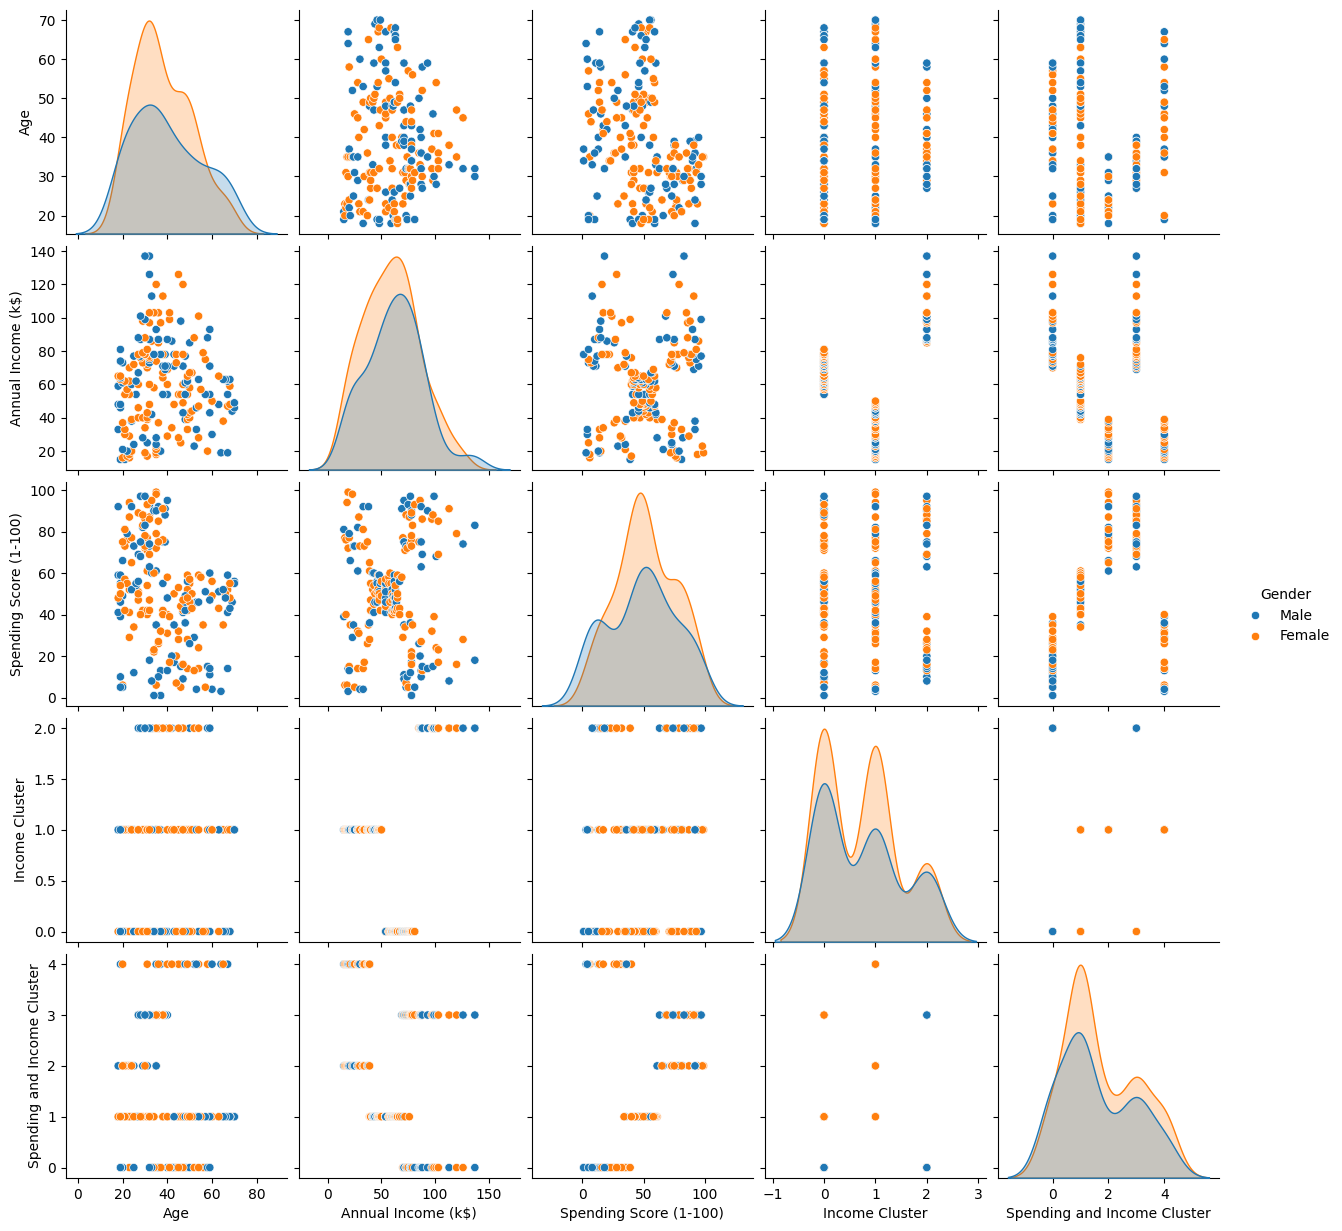

In [54]:
sns.pairplot(df, hue='Gender')
#Vytvoří tabulku grafů pro všechny numerické sloupce v DataFrame df a zabarví je podle pohlaví (Gender). Tento graf ukazuje vztahy mezi všemi možnými dvojicemi sloupců.

In [17]:
df.groupby('Gender')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()
#Provede zeskupení dat podle pohlaví a spočítá průměrné hodnoty pro sloupce Age, Annual Income (k$) a Spending Score (1-100) v rámci jednotlivých skupin (muži a ženy).

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [18]:
df.select_dtypes(include=['number']).corr()
#Spočítá korelační matici mezi numerickými sloupci v DataFrame 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


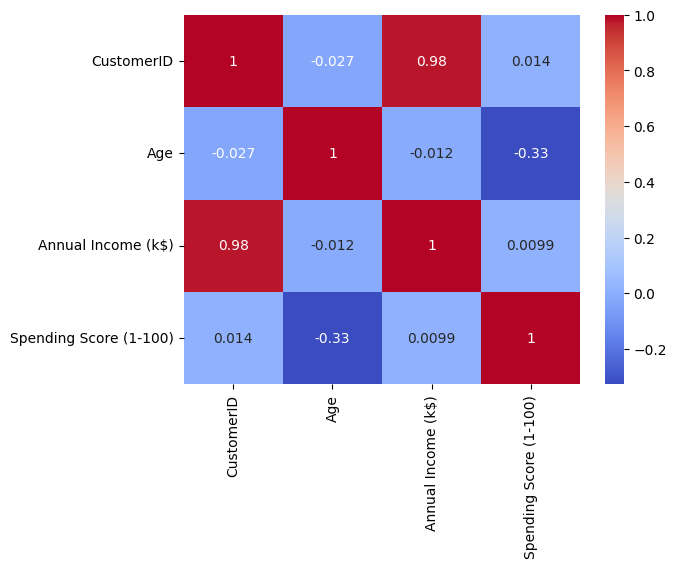

In [19]:
corr_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
#Vybere všechny numerické sloupce a spočítá korelaci mezi nimi. Výsledkem bude korelační matice (tabulka, která ukazuje vztah mezi každými dvěma proměnnými).

## Clustering - Univariate, Bivariate, Multivariate

In [ ]:
clustering1=KMeans(n_clusters=3)
#Vytvoří model K-means clusteringu s 3 shluky (clusters).

In [ ]:
clustering1.fit(df[['Annual Income (k$)']])
#Použije model KMeans k shlukování dat pouze na základě sloupce "Annual Income (k$)".

KMeans(n_clusters=3)

In [ ]:
clustering1.labels_
#Vrátí labels (štítky) pro každý záznam v datasetu, které označují, do kterého shluku (clusteru) byl přiřazen.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
df['Income Cluster']=clustering1.labels_
df.head()
#Přidá nový sloupec 'Income Cluster' do DataFrame.

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,3
1,Male,21,15,81,0,0
2,Female,20,16,6,0,3
3,Female,23,16,77,0,0
4,Female,31,17,40,0,3


In [ ]:
df['Income Cluster'].value_counts()
#Spočítá počet záznamů v každém shluku (clusteru), který je přiřazen ve sloupci 'Income Cluster'.

Income Cluster
2    92
0    72
1    36
Name: count, dtype: int64

In [ ]:
clustering1.inertia_
#Vrátí hodnotu inertia (inercie) pro model KMeans. Inercie je míra toho, jak dobře jsou data rozdělena mezi shluky.

23528.152173913055

In [ ]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)
#Inertia_scores bude seznam hodnot inercie pro počty shluků od 1 do 10. Tento seznam umožní vidět, jak se mění inercie s rostoucím počtem shluků.

In [62]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 23517.330930930926,
 13278.112713472487,
 8481.496190476191,
 5050.904761904763,
 3989.7157894736856,
 2822.4996947496943,
 2217.6406204906207,
 1745.8751748251748]

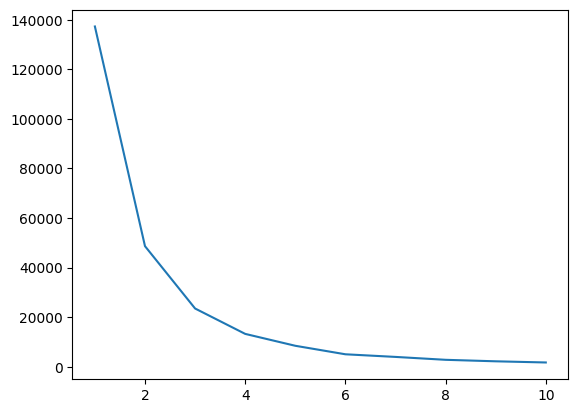

In [ ]:
plt.plot(range(1,11),inertia_scores)
#Vykreslí graf, který ukazuje, jak se mění hodnota inercie v závislosti na počtu shluků (od 1 do 10). Tento graf je možné použít k vizualizaci, jak se model KMeans chová při různém počtu shluků.

In [64]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster'],
      dtype='object')

In [ ]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
#Výstup bude tabulka, která ukazuje průměrné hodnoty pro věk, roční příjem a spendovací skóre v rámci jednotlivých shluků Income Cluster.

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.930556,33.027778,50.166667
1,37.833333,99.888889,50.638889
2,39.184783,66.717391,50.054348


In [66]:
#Bivariate Clustering

In [ ]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()
#Nový sloupec(Spending and Income Cluster) ukáže, do jakého shluku spadají jednotliví zákazníci podle jejich ročního příjmu a spendovacího skóre.

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,3
1,Male,21,15,81,0,0
2,Female,20,16,6,0,3
3,Female,23,16,77,0,0
4,Female,31,17,40,0,3


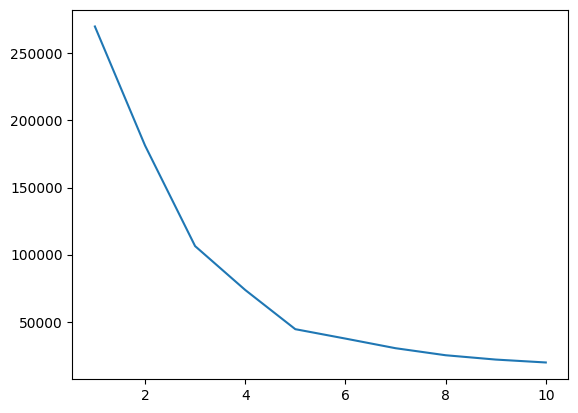

In [ ]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)
#Vytvoří graf, který umožní vizualizovat, jak se mění inercie při různém počtu shluků

In [ ]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']
#Vytvoří nový DataFrame centers, který obsahuje centroidy (střední hodnoty) pro každý shluk v následujících sloupcích:'x': Průměrný roční příjem v daném shluku. 'y': Průměrné spendovací skóre v daném shluku.

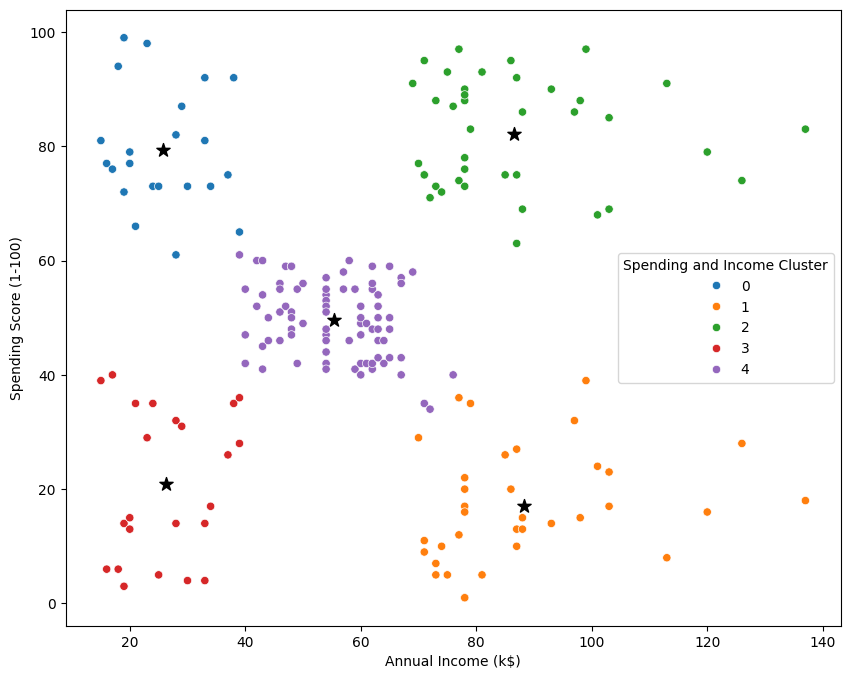

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')
#Výsledkem bude graf s bodem pro každý záznam v datasetu, přičemž centroidy shluků budou vyznačeny černými hvězdami. Tento graf poskytuje vizuální přehled o tom, jak jsou zákazníci rozděleni do jednotlivých shluků podle těchto dvou proměnných.

In [ ]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')
# Vrací kontingenční tabulka, kde řádky představují jednotlivé shluky ('Spending and Income Cluster'). Sloupce představují pohlaví ('Gender').Hodnoty v tabulce jsou procentuální podíly pohlaví v každém shluku.

Gender,Female,Male
Spending and Income Cluster,,
0,0.590909,0.409091
1,0.457143,0.542857
2,0.538462,0.461538
3,0.608696,0.391304
4,0.592593,0.407407


In [ ]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
#Vrací DataFrame s průměrnými hodnotami pro věk, roční příjem a spendovací skóre v každém shluku. Výsledkem bude tabulka, kde každý řádek představuje průměr pro daný shluk a každý sloupec průměrné hodnoty pro příslušné proměnné.


,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,25.272727,25.727273,79.363636
1,41.114286,88.200000,17.114286
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,42.716049,55.296296,49.518519


In [ ]:
#mulivariate clustering 
from sklearn.preprocessing import StandardScaler
#Příkaz importuje třídu StandardScaler z knihovny sklearn.preprocessing. StandardScaler je nástroj pro standardizaci (normalizaci) dat, což znamená, že přepočítá každý sloupec dat na základě průměru (mean) a standardní odchylky (standard deviation).

In [ ]:
scale = StandardScaler()
#Vytváří instanci třídy StandardScaler, která je součástí knihovny sklearn.preprocessing.

In [75]:
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,3
1,Male,21,15,81,0,0
2,Female,20,16,6,0,3
3,Female,23,16,77,0,0
4,Female,31,17,40,0,3


In [ ]:

dff = pd.get_dummies(df,drop_first=True)
#Převádí kategorické proměnné na dummy proměnné (binární indikátory).
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,0,3,True
1,21,15,81,0,0,True
2,20,16,6,0,3,False
3,23,16,77,0,0,False
4,31,17,40,0,3,False


In [77]:
dff.columns


Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [78]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [79]:
dff = scale.fit_transform(dff)


In [ ]:
dff = pd.DataFrame(scale.fit_transform(dff))
#Provádí standardizaci (normalizaci) dat v DataFrame
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


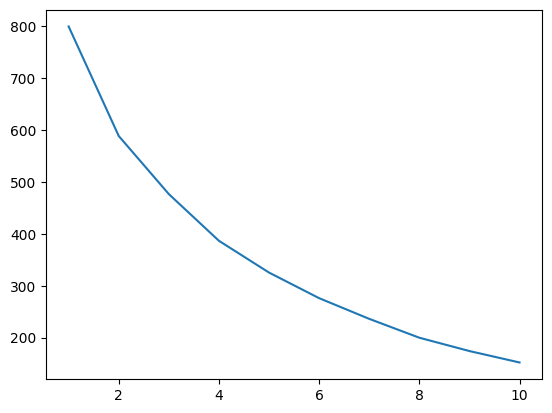

In [ ]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)
#Provádí vyhledávání optimálního počtu shluků (clusters) pro K-means algoritmus na standardizovaných datech.

In [82]:
df


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,3
1,Male,21,15,81,0,0
2,Female,20,16,6,0,3
3,Female,23,16,77,0,0
4,Female,31,17,40,0,3
...,...,...,...,...,...,...
195,Female,35,120,79,1,2
196,Female,45,126,28,1,1
197,Male,32,126,74,1,2
198,Male,32,137,18,1,1


In [ ]:
df.to_csv('Clustering.csv')